In [1]:
!pip install yfinance
!pip install pytickersymbols

     |████████████████████████████████| 5.5MB 17.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=2cb70e5757fd353c8414c12b1a8332eac24b63d80bd9836ca57c1a6933a9f7e9
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 81kB 4.7MB/s 
     |████████████████████████████████| 276kB 14.1MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44621 sha256=c4b770c5021427902423f1e2420640c3983386541051831ec9e487d9dab11d82
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
import yfinance
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from pytickersymbols import PyTickerSymbols
from google.colab import files
from datetime import datetime, timedelta

In [3]:
start="2001-01-01"
end="2021-01-01"

period = 20
multiplier = 2

limit_inf = [-.04]
#limit_inf = [-.09,-.09,-.09,-.07,-.07,-.07,-.05,-.05,-.05]
limit_sup = [-.02]
#limit_sup = [-.07,-.07,-.07,-.05,-.05,-.05,-.03,-.03,-.03]
risk = [3]
#risk = [1,2,3,1,2,3,1,2,3]

precio_min = [20]
#precio_min = [20,20,20,20, 20,20,20,20,20]
precio_max = [35]
#precio_max = [1000] * 9

In [4]:
ticker = yfinance.Ticker('QQQ')
df = ticker.history(interval="1d",start=start,end=end)
# df_to_plot = pd.DataFrame(index=df.index)

In [5]:
stock_data = PyTickerSymbols()

nasdaq_100=pd.DataFrame(stock_data.get_stocks_by_index('NASDAQ 100'))
nasdaq_100 = nasdaq_100[nasdaq_100.symbol != 'CTRP'].reset_index().symbol.to_list()

sp_500=pd.DataFrame(stock_data.get_stocks_by_index('S&P 500'))
sp_500 = sp_500[sp_500.symbol != 'SSE']
sp_500 = sp_500[sp_500.symbol != 'RTN']
sp_500 = sp_500[sp_500.symbol != 'CXO']
sp_500 = sp_500[sp_500.symbol != 'JEC']
sp_500 = sp_500[sp_500.symbol != 'TIF'].reset_index().symbol.to_list()

total_tickers = nasdaq_100 + sp_500

today = datetime.today().strftime('%Y-%m-%d')

In [6]:
len(total_tickers)

592

In [7]:
#FILTRO PARA TICKERS
# tickers_list = []
# for i in range(len(total_tickers)):
#   ticker = yfinance.download(total_tickers[i], today)[['Close', 'Volume']]
#   if ticker['Close'][0] > 30 and ticker['Close'][0] < 120 and ticker['Volume'][0] > 5000000:
#     tickers_list.append(total_tickers[i])

In [8]:
#tickers_list

In [9]:
#COPIADOS DEL FILTRO EL 27/01/2021
tickers_list = ['CSCO','INTC','WBA','ATVI','AMAT','CMCSA','CSX','EBAY','FISV','GILD','JD','KHC','MU','MDLZ','SBUX','EXC','AMD','FOXA','KDP',
 'MRVL','AXP','CVX','CSCO','KO','DOW','XOM','INTC','MRK','PFE','VZ','WBA','ATVI','AMAT','CMCSA','CSX','DISCA','DISH','EBAY','FISV','GILD','KHC',
 'MU','MDLZ','STX','SBUX','WDC','ABT','ABBV','MO','AIG','BK','BMY','COF','C','CL','COP','CVS','EXC','GM','MDT','MET','MS','NEE','ORCL','SPG','USB',
 'WFC','AMD','BWA','BSX','CNC','CFG','ED','GLW','DAL','EOG','FE','FOXA','GIS','IFF','IRM','K','KR','LB','MPC','NEM','SCHW','LUV','SYF','TPR','TJX',
 'TWTR','UAL','VFC','CARR','DOW','LVS','VIAC']

len(tickers_list)

98

In [10]:
tickers_list = list(set(total_tickers))
len(tickers_list)

514

In [11]:
# get stock info
#yfinance.Ticker("msft").info

In [12]:
iteracion = pd.DataFrame(['Límite Inf', 'Límite Sup', 'Riesgo (R)', 'Precio min', 'Precio max'], 
                         index=['Límite Inf', 'Límite Sup', 'Riesgo (R)', 'Precio min', 'Precio max']).drop(columns=0)

In [13]:
totales = pd.DataFrame(['Total de trades:', 'Trades/día', '% Winners', '% Greens', '% Reds', '% Losers', 'R/Green Trade', 'R/Red Trade', 'R/Trade'], 
                       index= ['Total de trades:','Trades/día', '% Winners','% Greens','% Reds','% Losers','R/Green Trade','R/Red Trade','R/Trade']).drop(columns=0)

In [14]:
#%%time

#tickers_list = ['TSLA'] #PARA PRUEBA CON UN SOLO TICKER

for k in range(len(risk)):
  df_totales = pd.DataFrame(['Total Trades', 'Cerró', 'Green', 'Red', 'Stopped', 'Green PL (Rs)','Red PL (Rs)', 'Total PL'], 
                          index=['Total Trades', 'Cerró', 'Green', 'Red', 'Stopped','Green PL (Rs)','Red PL (Rs)', 'Total PL'])
  df_totales2 = pd.DataFrame.copy(df_totales.drop(columns=0))
  d = pd.DataFrame.copy(pd.DataFrame(index=df.index))

  for j in range(len(tickers_list)):

      ticker = yfinance.Ticker(tickers_list[j])
      df = ticker.history(interval="1d",start=start,end=end)
      #df['UpperBand'] = df['Close'].rolling(period).mean() + df['Close'].rolling(period).std() * multiplier
      #df['LowerBand'] = df['Close'].rolling(period).mean() - df['Close'].rolling(period).std() * multiplier

      df2 = df[['Open', 'High', 'Low', 'Close']]#, 'UpperBand']]#, 'LowerBand'
      df2 = df2.dropna()

      df2['%'] = (df2['Open'] - df2['Close'].shift(1)) / df2['Close'].shift(1)
      df2['Range'],df2['Cerró'],df2['Stopped'],df2['Red'],df2['Green'],df2['PL Red'],df2['PL Green'] = np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan
      
      for i in range(1,len(df2)):
        if (df2['%'][i] >= limit_inf[k] and df2['%'][i] < limit_sup[k] and df2['Open'][i] >= precio_min[k] and df2['Open'][i] < precio_max[k]):
          df2['Range'][i] = True

      for i in range(1,len(df2)):
        if df2['Range'][i] == True:
          stop = (df2['Open'][i]-((df2['Close'][i-1] - df2['Open'][i])/risk[k]))
          if df2['High'][i] >= df['Close'][i-1]:
            df2['Cerró'][i] = 1
            df2['PL Green'][i] = risk[k]
            df2['Red'][i] = 0
            df2['Green'][i] = 0
          else:
            df2['Cerró'][i] = 0
            df2['PL Green'][i] = 0

          if df2['Low'][i] <= stop:
            df2['Stopped'][i] = 1
            df2['PL Red'][i] = -1
            df2['Red'][i] = 0
            df2['Green'][i] = 0
          else:
            df2['Stopped'][i] = 0
            df2['PL Red'][i] = 0

      for i in range(1,len(df2)):
        if df2['Range'][i] == True:
          if df2['Stopped'][i] != True and df2['Cerró'][i] != True and df2['Close'][i] < df2['Open'][i] and df2['Open'][i] != df2['Close'][i-1]:
            df2['Red'][i] = 1
            df2['PL Red'][i] = (df2['Close'][i] - df2['Open'][i]) / ((df2['Close'][i-1] - df2['Open'][i])/risk[k])
            df2['PL Green'][i] = 0
            df2['Green'][i] = 0
          elif df2['Stopped'][i] != True and df2['Cerró'][i] != True and df2['Close'][i] > df2['Open'][i] and df2['Open'][i] != df2['Close'][i-1]:
            df2['Green'][i] = 1
            df2['PL Green'][i] = (df2['Close'][i] - df2['Open'][i]) / ((df2['Close'][i-1] - df2['Open'][i])/risk[k])
            df2['PL Red'][i] = 0
            df2['Red'][i] = 0
      
      df2['Total Trades'] = df2['Cerró'] + df2['Stopped'] + df2['Red'] + df2['Green']
      df2['PL'] = df2['PL Red'] + df2['PL Green']

      df_totales2.insert(j, tickers_list[j], [df2['Total Trades'].sum(), df2['Cerró'].sum(), df2['Green'].sum(),
                                           df2['Red'].sum(), df2['Stopped'].sum(), df2['PL Green'].sum(),
                                           df2['PL Red'].sum(), (df2['PL Green'].sum() + df2['PL Red'].sum())])
      
      pl_list = df2['PL'].to_list()

      while len(pl_list) < len(d):
        pl_list.append(0)
      
      d.insert(j, tickers_list[j], pl_list)

  df_totales2['sum'] = df_totales2.sum(axis=1)
  iteracion.insert(k,k, [limit_inf[k], limit_sup[k], risk[k], precio_min[k], precio_max[k]])
  #df_totales2 = df_totales.transpose()
  totales.insert(k, k, [df_totales2['sum'][0], df_totales2['sum'][0]/5040,df_totales2['sum'][1]/df_totales2['sum'][0], df_totales2['sum'][2]/df_totales2['sum'][0], 
                        df_totales2['sum'][3]/df_totales2['sum'][0], df_totales2['sum'][4]/df_totales2['sum'][0], 
                        df_totales2['sum'][5]/(df_totales2['sum'][1]+df_totales2['sum'][2]), df_totales2['sum'][6]/(df_totales2['sum'][3]+df_totales2['sum'][4]),
                        df_totales2['sum'][7]/df_totales2['sum'][0]])

In [15]:
iteracion

,0
Límite Inf,-0.04
Límite Sup,-0.02
Riesgo (R),3.00
Precio min,20.00
Precio max,35.00


In [16]:
totales

,0
Total de trades:,12719.000000
Trades/día,2.523611
% Winners,0.311345
% Greens,0.098435
% Reds,0.015174
% Losers,0.575045
R/Green Trade,2.582462
R/Red Trade,-0.982998
R/Trade,0.478058


In [17]:
d['sum'] = d.sum(axis=1).cumsum()

In [18]:
d

,TPR,LEG,IQV,VIAC,WEC,NVDA,BLL,JCI,HLT,REGN,ROST,SO,INCY,XYL,EBAY,CDNS,MTD,IDXX,CNP,DHI,ILMN,LEN,TFX,SYK,NVR,ZM,CTSH,UNH,CE,FAST,ABMD,WST,CBOE,AZO,HPQ,SWK,FTV,HCA,JKHY,LB,...,MDT,LYB,ETN,MHK,FFIV,IBM,CI,ALL,PFE,DVA,ROP,MKC,NOW,ULTA,PPG,BKNG,SYY,MCK,BIIB,ESS,CMI,ALB,CERN,HD,TSLA,CAH,KR,FLIR,ETR,CSCO,FRC,CCI,MSCI,AME,CTLT,ADI,WDAY,EFX,TJX,sum
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2001-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.000000
2001-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000
2001-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.000000
2001-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,6080.423502
2020-12-28,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,6080.423502
2020-12-29,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,6080.423502


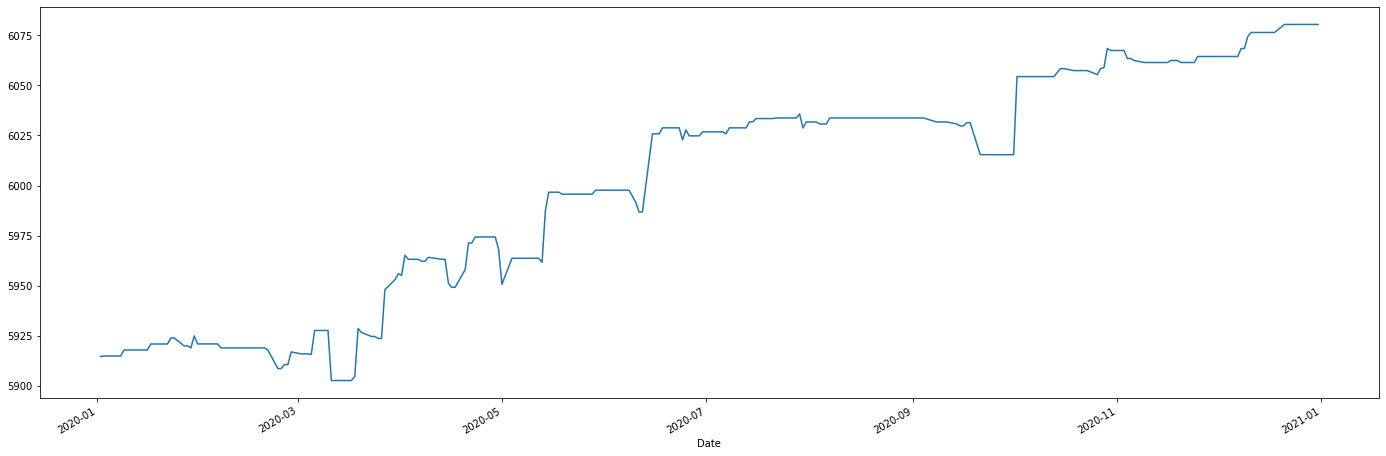

In [22]:
plt.figure(figsize=[24,8])
d['sum']['2020-01-01':'2020-12-31'].plot()
plt.show()
#['2020-01-01':'2020-12-31']

In [20]:
#df2[(df2['Range']==1.0)].head(65)
#df2[(df2['Trigger']==1.0) | (df2['Outside']==1.0)].head(60)
#df2.loc['2015-04-29':'2015-05-01']

In [21]:
#df2.loc['2020-06-11':'2020-06-12']